In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('D:/download_D/digit-recognizer/train.csv')

In [4]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
print(len(data))
data_train=data[1000:10000]
X=data_train[:,1:]/255
Y=data_train[:,0]


42000


In [19]:
X.shape

(9000, 784)

In [20]:
X_val=X[:int(0.1*len(X))]
Y_val=Y[:int(0.1*len(X))]
X=X[int(0.1*len(X)):]
Y=Y[int(0.1*len(Y)):]
Y.shape

(8100,)

In [21]:
def createW(hid_lay):
    W=[]
    W.append(np.random.rand(785,hid_lay[0])-0.5)
    for i in range(len(hid_lay)-1):
        W.append(np.random.rand(hid_lay[i]+1,hid_lay[i+1])-0.5)
    W.append(np.random.rand(hid_lay[-1]+1,10)-0.5)
    return W

In [22]:
def input_lay_nod():
    hid_lay=[]
    n_hidden=eval(input('nhap so hiden layer: '))
    for hidden in range(1,n_hidden+1):
        numnode=eval(input(f'nhap so node cua lop {hidden}'))
        hid_lay.append(numnode)
    return hid_lay


In [23]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [24]:
def addBias(x):
    bs=np.ones((len(x),1))
    return np.concatenate((bs,x),axis=1)

In [25]:
def makelayer(X,W):#(9000,785)
    Z=np.matmul(X,W)
    A=sigmoid(Z)
    A=addBias(A)
    return A

In [26]:
def forward_prop(X,W,hid_lay):
    Ai=[addBias(X)]
    for num_lay in range(len(hid_lay)+1):
        a=makelayer(Ai[num_lay],W[num_lay])
        Ai.append(a)
    return Ai

In [27]:
def backward_prop(A,W,Y,e):
    dE_dW=[]
    dE_dZ=(A[-1][:,1:]-Y)#(9000,10)
    dE_dW.append(np.matmul(A[-2].transpose(),dE_dZ))#(101,9000)x(9000,10)
    W[-1]-=e*dE_dW[0]
    #
    dE_dA=np.matmul(dE_dZ,W[-1].transpose())#(9000,10)x(10,101)
    dE_dZ=dE_dA*A[-2]*(1-A[-2])#(9000,101)
    dE_dW.append(np.matmul(A[-3].transpose(),dE_dZ))
    W[-2]-=e*dE_dW[1][:,1:]
    for i in range(2,len(W)):
        dE_dZ=dE_dZ[:,1:]
        dE_dA=np.matmul(dE_dZ,W[-i].transpose())#(9000,10)x(10,101)
        dE_dZ=dE_dA*A[-i-1]*(1-A[-i-1])#(9000,101)
        dE_dW.append(np.matmul(A[-i-2].transpose(),dE_dZ))
        W[-i-1]-=e*dE_dW[i][:,1:]
    return W,(Y-A[-1][:,1:])**2


In [28]:
def makeLabel(num,num_class):
    vec = np.zeros(num_class)
    vec[num] = 1
    return vec
T = map(makeLabel,Y,[10]*len(Y))
T = np.array(list(T))

In [29]:
hid_lay=input_lay_nod()
W=createW(hid_lay)
accu=np.array([[]])
accu_val=np.array([[]])
lost=np.array([[]])

In [ ]:

for o in range(1,500):
    A=forward_prop(X,W,hid_lay)
    A_val=forward_prop(X_val,W,hid_lay)
    pred=np.argmax(A[-1][:,1:],axis=1)
    pred_val=np.argmax(A_val[-1][:,1:],axis=1)
    exa=np.sum(pred==Y)
    exa_val=np.sum(pred_val==Y_val)
    print('acc',exa/len(X))
    print('acc',exa_val/len(X_val))
    W,loss=backward_prop(A,W,T,0.00003)
    lot=np.sum(loss/len(X))
    print('loss ',lot)
    lot=np.array([[lot]])
    acc=np.array([[exa/len(X)]])
    acc_val=np.array([[exa_val/len(X_val)]])
    lost=np.concatenate((lost,lot),axis=None)
    accu=np.concatenate((accu,acc),axis=None)
    accu_val=np.concatenate((accu_val,acc_val),axis=None)


array([[-0.        , -0.        , -0.11179115, ..., -0.08932911,
        -0.        ,  0.26114423],
       [ 0.        ,  0.        ,  0.32420568, ...,  0.21867785,
        -0.        , -0.02181537],
       [-0.        ,  0.        ,  0.44896322, ..., -0.16046005,
         0.        ,  0.24727456],
       ...,
       [-0.        , -0.        , -0.03888627, ..., -0.29699458,
        -0.        ,  0.27929719],
       [-0.        ,  0.        , -0.45788117, ..., -0.12371323,
        -0.        , -0.09521074],
       [-0.        ,  0.        ,  0.37135925, ...,  0.3932965 ,
         0.        , -0.25920381]])

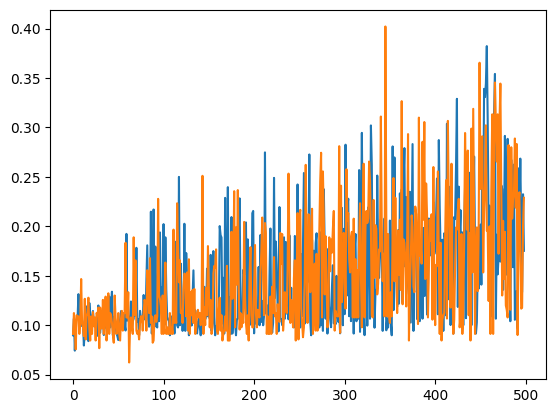

In [ ]:

plt.plot(accu)
plt.plot(accu_val)
plt.show()

